# Time Series Data Exploration & Visualization Assignment

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

### Read the sales.csv data set into a Pandas dataframe.

In [2]:
sales_df = pd.read_csv('../data/sales.csv', sep=';')

In [3]:
sales_df.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber
0,1,6,27039,381,7,NaN,"0,00",2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G
1,2,16,25011,61,7,NaN,"0,00",2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8
2,3,13,94024,23,24,NaN,"0,00",2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0
3,4,8,73966,176,19,0.2,"0,00",2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE
4,5,10,32653,310,9,NaN,"0,00",2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3


### Convert the SalesDate field to a datetime data type.

In [4]:
sales_df['SalesDate'] = pd.to_datetime(sales_df['SalesDate'])
sales_df['date'] = sales_df['SalesDate'].dt.date

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,date
0,1,6,27039,381,7,NaN,"0,00",2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G,2018-02-05
1,2,16,25011,61,7,NaN,"0,00",2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8,2018-02-02
2,3,13,94024,23,24,NaN,"0,00",2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0,2018-05-03
3,4,8,73966,176,19,0.2,"0,00",2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE,2018-04-07
4,5,10,32653,310,9,NaN,"0,00",2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3,2018-02-12
...,...,...,...,...,...,...,...,...,...,...
6758120,6758121,10,50938,300,13,NaN,"0,00",2018-04-20 22:39:03.150,AHVBHVO7632V5YYD2VJT,2018-04-20
6758121,6758122,18,85668,452,22,0.1,"0,00",2018-01-13 15:08:18.700,M4IA0FS13J9F0GJD4BX8,2018-01-13
6758122,6758123,21,68409,405,18,NaN,"0,00",2018-01-18 12:05:16.950,7VZJ77UGBSX2SNCC1GFW,2018-01-18
6758123,6758124,17,90315,104,23,NaN,"0,00",2018-02-26 08:13:37.850,3JTF5IF0YJLLXF9IRS8X,2018-02-26


### Create a line chart showing the number of total units sold per day in February.

In [5]:
feb_df = sales_df[sales_df['SalesDate'].dt.month == 2]
feb_df

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,date
0,1,6,27039,381,7,NaN,"0,00",2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G,2018-02-05
1,2,16,25011,61,7,NaN,"0,00",2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8,2018-02-02
4,5,10,32653,310,9,NaN,"0,00",2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3,2018-02-12
5,6,13,28663,413,8,NaN,"0,00",2018-02-07 10:33:24.990,3KTAYIZPGDQMZMRWZ8NG,2018-02-07
11,12,17,28353,285,8,NaN,"0,00",2018-02-07 00:50:06.000,BLQPUVH22XKER90WAW7P,2018-02-07
...,...,...,...,...,...,...,...,...,...,...
6758093,6758094,22,85541,115,22,NaN,"0,00",2018-02-02 21:20:39.610,X21CAF13I0H6TKZJPQKA,2018-02-02
6758095,6758096,3,40093,378,11,NaN,"0,00",2018-02-01 11:05:27.740,H8JN2AS3G3DRWBULWXH2,2018-02-01
6758096,6758097,15,14839,407,4,NaN,"0,00",2018-02-10 20:54:19.200,C5JERNPM7TQJJ40VSAN6,2018-02-10
6758103,6758104,16,2643,27,1,NaN,"0,00",2018-02-26 11:37:34.800,AUZ5HF2B7ZRQ0YCEKU9T,2018-02-26


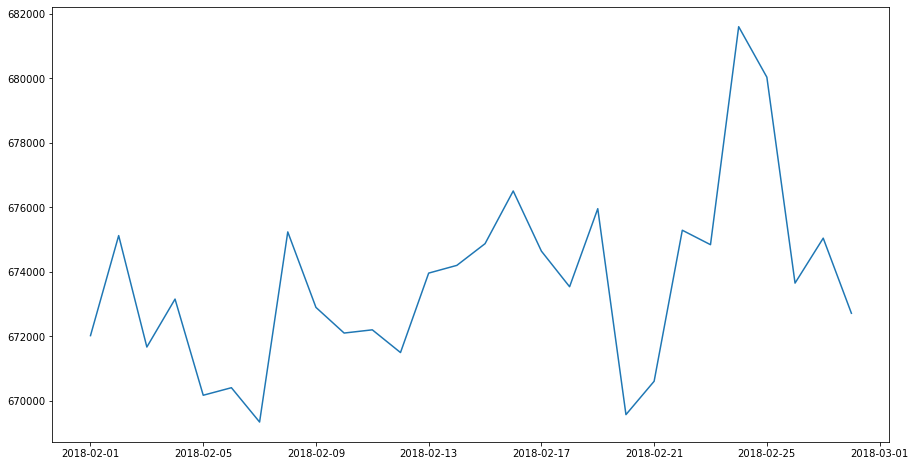

In [6]:
grp_df = feb_df.groupby('date').sum().reset_index()
plt.figure(figsize=(15,8))
plt.plot('date', 'Quantity', data=grp_df)
plt.show()

### Create a multi-line chart comparing the daily units sold in March for the following product IDs: 124, 344, 407, and 449.

In [7]:
sales_df['month'] = sales_df['SalesDate'].dt.month
march_df = sales_df[(sales_df['month'] == 3) & (sales_df['ProductID'].isin([124, 344, 407, 449]))]
march_df = pd.pivot_table(march_df, values='Quantity', index='date', columns='ProductID', aggfunc=np.sum)
march_df = march_df.reset_index('date')
march_df

ProductID,date,124,344,407,449
0,2018-03-01,1617,1413,1696,1343
1,2018-03-02,1737,1374,1733,1292
2,2018-03-03,1309,1695,1486,1432
3,2018-03-04,1308,1675,1323,1466
4,2018-03-05,1645,1182,1540,1467
5,2018-03-06,1420,1558,1392,1388
6,2018-03-07,1551,1597,1723,1472
7,2018-03-08,1667,1642,1584,1585
8,2018-03-09,1453,1532,1214,1412
9,2018-03-10,1378,1559,1658,1181


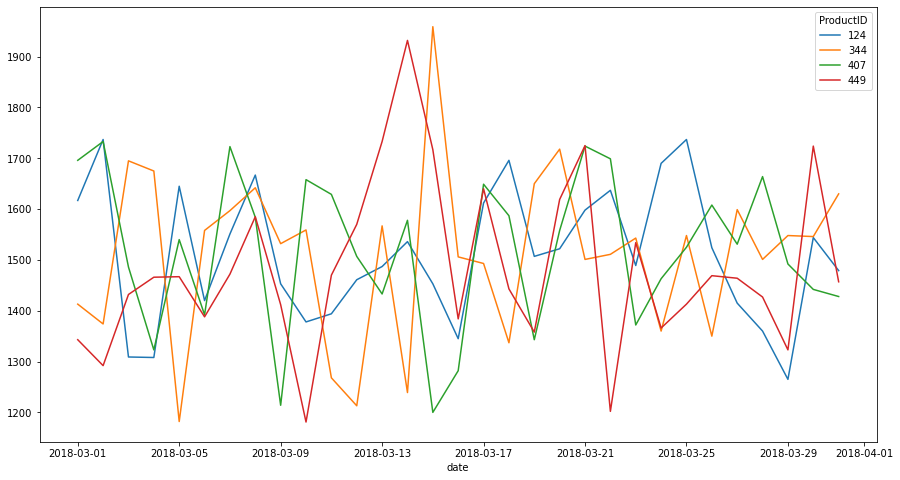

In [8]:
march_df.plot(x='date', y=[124, 344, 407, 449], kind='line', figsize=(15,8))
plt.show()

### Create a bar chart that shows units sold by each hour of the day.

In [23]:
def barchart(df, x, y, groups=None, length=8, width=14, title=""):
    plt.figure(figsize=(width,length))
    sns.barplot(data=df, x=x, y=y, hue=groups)
    plt.title(title + "\n", fontsize=16)

In [24]:
sales_df['hour'] = sales_df['SalesDate'].dt.hour
hour_df = sales_df.groupby('hour').sum().reset_index()

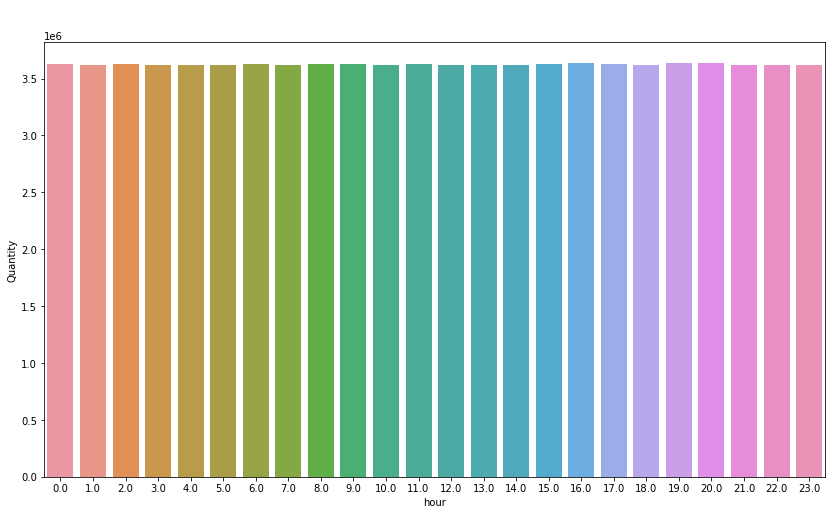

In [25]:
barchart(hour_df, 'hour', 'Quantity')

### Create a heatmap that shows total unit sales by hour of the day and day of the week.

In [27]:
def heatmap(df, length=8, width=18, title=""):
    plt.figure(figsize=(width,length))
    ax = sns.heatmap(df, annot=True, fmt='.1f', 
                     cmap='Reds', linewidths=.01)
    
    plt.title(title + "\n", fontsize=16)

In [29]:
sales_df['weekday'] = sales_df['SalesDate'].dt.weekday
pivot = sales_df.pivot_table(values='Quantity', index='hour', columns='weekday', aggfunc='sum')

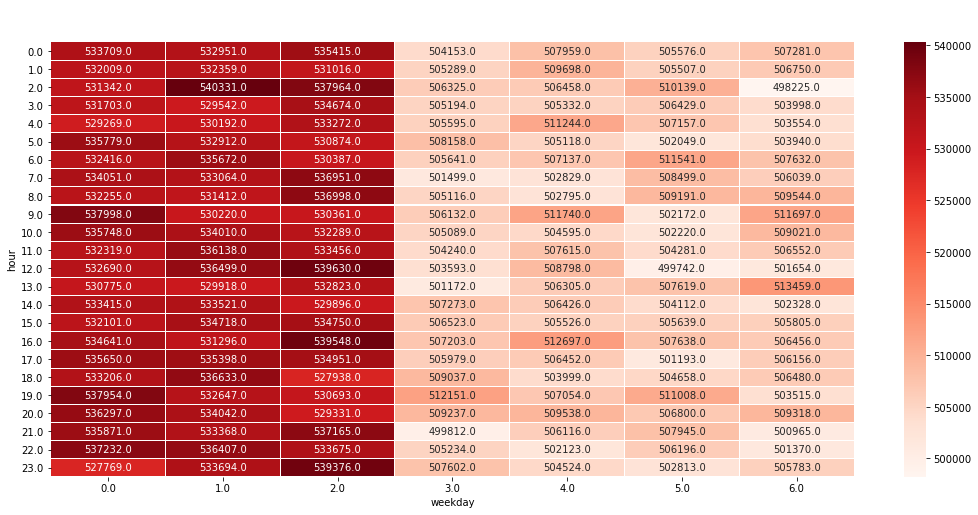

In [30]:
heatmap(pivot)

### Choose 20 ProductIDs at random and create a correlation plot showing the correlation of daily units sold for them 

In [12]:
def correlation_plot(df, title=""):
    corr = df.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    plt.subplots(figsize=(15, 10))
    cmap = sns.diverging_palette(6, 255, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=.5)
    plt.title(title + "\n", fontsize=20)


In [39]:
prod_ids = set(sales_df['ProductID'].unique())
rand = random.sample(prod_ids, k=20)
rand

[126,
 70,
 372,
 230,
 128,
 233,
 403,
 289,
 383,
 137,
 1,
 19,
 39,
 194,
 3,
 430,
 181,
 26,
 411,
 333]

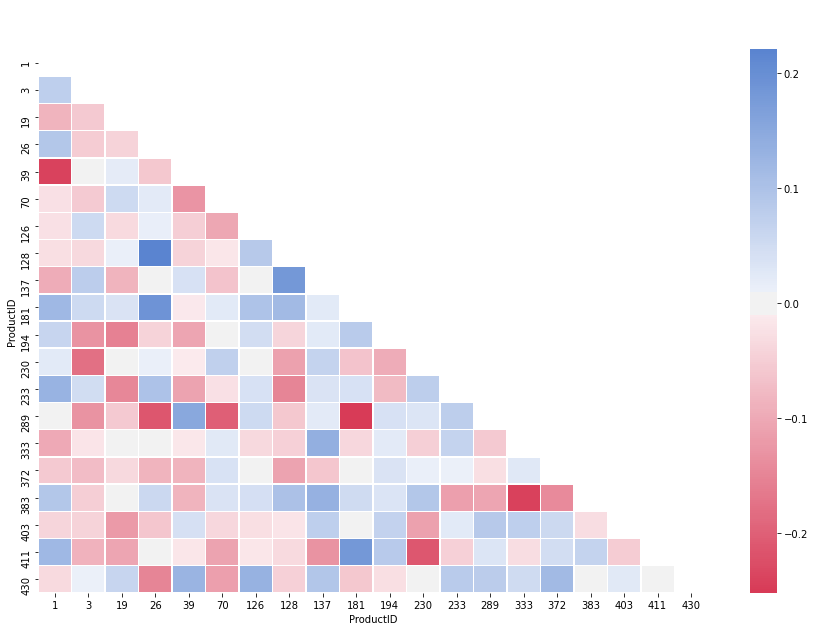

In [44]:
sample_df = sales_df[sales_df['ProductID'].isin(rand)]
pivot = sample_df.pivot_table(values='Quantity', index='date', columns='ProductID', aggfunc='sum')
correlation_plot(pivot)

### Create a histogram showing the distribution of daily units sold.

In [45]:
def histogram(df, field=None, length=8, width=15, title=""):
    plt.figure(figsize=(width,length))
    sns.distplot(df[field])
    plt.title(title + "\n", fontsize=16)

In [48]:
daily = sales_df.groupby('date').sum().reset_index()

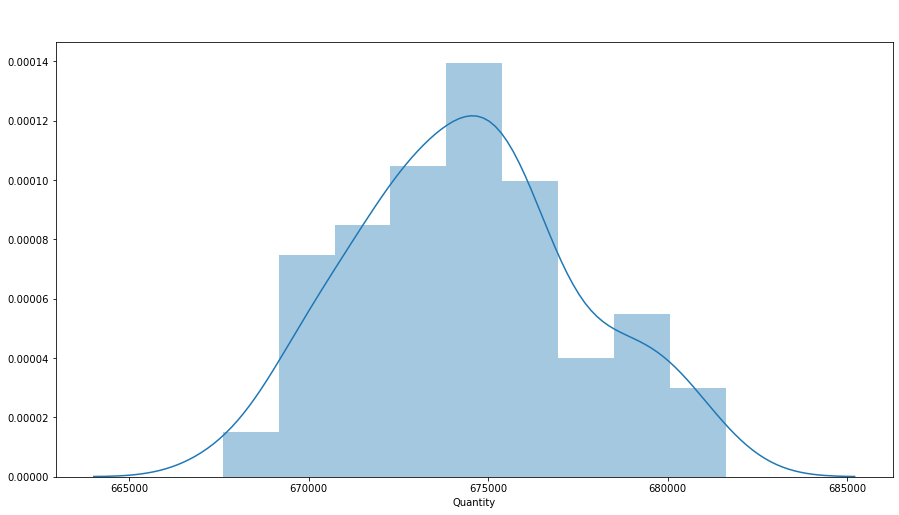

In [49]:
histogram(daily, field='Quantity')

### Create a violin plot showing the distribution of daily units sold by month.

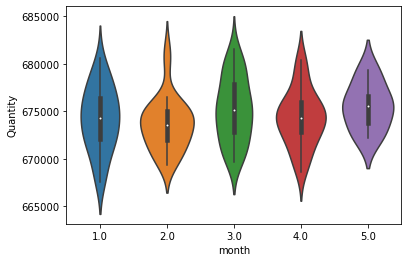

In [52]:
date_month = sales_df.groupby(['date', 'month']).sum().reset_index()
ax = sns.violinplot(x="month", y="Quantity", data=date_month)
plt.show()